Progress: 65536

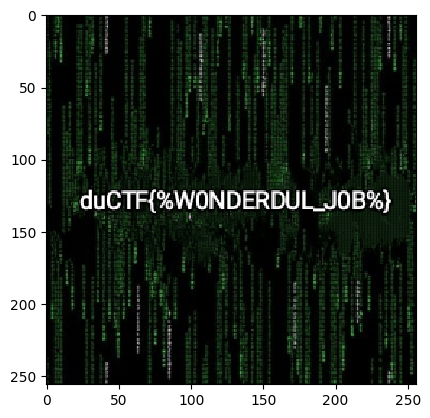

In [4]:
import socket
import sys
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

# Define server address and port
server_address = 'pwn.ductf.com'
server_port = 9999
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
client_socket.connect((server_address, server_port))

i = 0
arr = list()
row = list()
rcnt = 0
while True:
    pixel = client_socket.recv(1024).decode()
    row.append([int(pixel.split(' ')[0]), int(pixel.split(' ')[1]), int(pixel.split(' ')[2])])
    i = i + 1
    if i%256==0:
        arr.append(row)
        rcnt = rcnt+1
        row = list()
    sys.stdout.write(f"\rProgress: {i}")
    sys.stdout.flush()
    if rcnt==256:
        break
    client_socket.sendall(pixel.encode())
client_socket.close()
arr = np.array(arr)
plt.imshow(arr, interpolation='none')
plt.show()